# Building the base Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('winequality-red.csv')
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24628\4098303021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

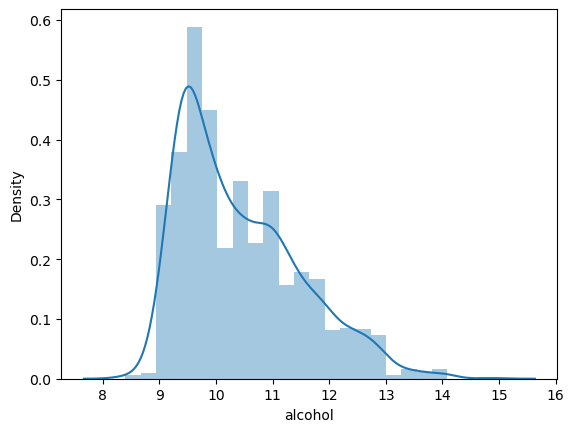

In [3]:
sns.distplot(data['alcohol'])

In [4]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [5]:
x=data.iloc[:,:-2]
x.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56


In [6]:
y=data.alcohol

In [7]:
y.shape

(1599,)

In [8]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('********************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('*********************Testing Data Shape*******************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

********************Training Data Shape********************

Training data-X- Shape:	 (1199, 10)

Training data-y- Shape:	 (1199,)

*********************Testing Data Shape*******************

Testing data(x-Input) Shape:	 (400, 10)

Testing data(y-Outcome) Shape:	 (400,)


# Base Model

# 1.Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
print('*'*100)
print('Linear Regression Model')
print('*'*100)
print('\n Training Phase')
lin_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',lin_reg.get_params())
print('Training completed')
print('='*100)
print('\n Test Phase')
ypred_lin_reg=lin_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)


#import metrics
from sklearn.metrics import r2_score,mean_squared_error

print('*'*100)
print('Linear Regression - Performance Measure')
print('*'*100)

Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))

print('Accuracy Score - Linear Regression: \t',Accuracy_lin_reg)
print()
print('MSE-linear Regression:\t',MSE_lin_reg)
print()
print('RMSE linear Regression:\t',RMSE_lin_reg)

****************************************************************************************************
Linear Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Training completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measure
****************************************************************************************************
Accuracy Score - Linear Regression: 	 0.664715459787808

MSE-linear Regression:	 0.3841076498952607

RMSE linear Regression:	 0.6197641889422627


# 2.KNN Regression

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg=KNeighborsRegressor(n_neighbors=3)
print('*'*100)
print('KNN Regression Model')
print('*'*100)
print('\n Training Phase')
knn_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',knn_reg.get_params())
print('Training completed')
print('='*100)
print('\n Test Phase')
ypred_knn=knn_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)


#import metrics
from sklearn.metrics import r2_score,mean_squared_error

print('*'*100)
print('KNN Regression - Performance Measure')
print('*'*100)

Accuracy_knn_reg=r2_score(ytest,ypred_knn)
MSE_knn=mean_squared_error(ytest,ypred_knn)
RMSE_knn=np.sqrt(mean_squared_error(ytest,ypred_knn))

print('Accuracy Score - Linear Regression: \t',Accuracy_knn_reg)
print()
print('MSE-linear Regression:\t',MSE_knn)
print()
print('RMSE linear Regression:\t',RMSE_knn)

****************************************************************************************************
KNN Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Training completed

 Test Phase

Testing completed
****************************************************************************************************
KNN Regression - Performance Measure
****************************************************************************************************
Accuracy Score - Linear Regression: 	 -0.05495741052515957

MSE-linear Regression:	 1.2085770833333336

RMSE linear Regression:	 1.0993530294374658


# 3. Decision Tree Regression model

In [11]:
from sklearn.tree import DecisionTreeRegressor

dt_reg=DecisionTreeRegressor()
print('*'*100)
print('DT Regression Model')
print('*'*100)
print('\n Training Phase')
dt_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_reg.get_params())
print('Training completed')
print('='*100)
print('\n Test Phase')
ypred_dt_reg=dt_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)


#import metrics
from sklearn.metrics import r2_score,mean_squared_error

print('*'*100)
print('Linear Regression - Performance Measure')
print('*'*100)

Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))

print('Accuracy Score - Linear Regression: \t',Accuracy_dt_reg)
print()
print('MSE-linear Regression:\t',MSE_dt_reg)
print()
print('RMSE linear Regression:\t',RMSE_dt_reg)

****************************************************************************************************
DT Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measure
****************************************************************************************************
Accuracy Score - Linear Regression: 	 0.5014852494287485

MSE-linear Regression:	 0.5711069444444444

RMSE linear Regression:	 0.755716179821793


# 4. Support Vector Regression

In [12]:
from sklearn.svm import SVR

svr=SVR()
print('*'*100)
print('SVR Regression Model')
print('*'*100)
print('\n Training Phase')
svr.fit(xtrain,ytrain)
print('Hyperparameter:\n',svr.get_params())
print('Training completed')
print('='*100)
print('\n Test Phase')
ypred_svr=svr.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)


#import metrics
from sklearn.metrics import r2_score,mean_squared_error

print('*'*100)
print('KNN Regression - Performance Measure')
print('*'*100)

Accuracy_svr=r2_score(ytest,ypred_svr)
MSE_svr=mean_squared_error(ytest,ypred_svr)
RMSE_svr=np.sqrt(mean_squared_error(ytest,ypred_svr))

print('Accuracy Score - SVR Regression: \t',Accuracy_svr)
print()
print('MSE-SVR Regression:\t',MSE_svr)
print()
print('RMSE SVR Regression:\t',RMSE_svr)

****************************************************************************************************
SVR Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Training completed

 Test Phase

Testing completed
****************************************************************************************************
KNN Regression - Performance Measure
****************************************************************************************************
Accuracy Score - SVR Regression: 	 -0.011578667537169407

MSE-SVR Regression:	 1.1588816604129015

RMSE SVR Regression:	 1.0765136601143999


# 5. Boosting - Adaboost with the base model - Lin reg

In [13]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('*'*100)
print('AdaBoost Regression Model')
print('*'*100)
print('\n Training Phase')
ada.fit(xtrain,ytrain)
print('Hyperparameter:\n',ada.get_params())
print('Training completed')
print('='*100)
print('\n Test Phase')
ypred_ada=ada.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)


#import metrics
from sklearn.metrics import r2_score,mean_squared_error

print('*'*100)
print('Adaboost Regression - Performance Measure')
print('*'*100)

Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(mean_squared_error(ytest,ypred_ada))

print('Accuracy Score - Linear Regression: \t',Accuracy_ada)
print()
print('MSE-linear Regression:\t',MSE_ada)
print()
print('RMSE linear Regression:\t',RMSE_ada)

****************************************************************************************************
AdaBoost Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__normalize': 'deprecated', 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 15, 'random_state': None}
Training completed

 Test Phase

Testing completed
****************************************************************************************************
Adaboost Regression - Performance Measure
****************************************************************************************************
Accuracy Score - Linear Regression: 	 0.6434420182345963

MSE-linear Regression:	 0.4084788649683354

RMSE linear Regression:	 0.639123513077

# 6. Boost - GradientBoost

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost=GradientBoostingRegressor(n_estimators=15)
print('*'*100)
print('GradientBoosting Regression Model')
print('*'*100)
print('\n Training Phase')
grad_boost.fit(xtrain,ytrain)
print('Hyperparameter:\n',grad_boost.get_params())
print('Training completed')
print('='*100)
print('\n Test Phase')
ypred_grad_boost=grad_boost.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)


#import metrics
from sklearn.metrics import r2_score,mean_squared_error

print('*'*100)
print('GradientBoosting Regression - Performance Measure')
print('*'*100)

Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(mean_squared_error(ytest,ypred_grad_boost))

print('Accuracy Score - Linear Regression: \t',Accuracy_grad_boost)
print()
print('MSE-GradientBoosting Regression:\t',MSE_grad_boost)
print()
print('RMSE GradientBoosting Regression:\t',RMSE_grad_boost)

****************************************************************************************************
GradientBoosting Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training completed

 Test Phase

Testing completed
****************************************************************************************************
GradientBoosting Regression - Performance Measure
*********************************************************************

# Model with Accuracy scores

In [15]:
scores=[('Linear Regression',Accuracy_lin_reg),
       ('KNN Regression',Accuracy_knn_reg),
       ('Decision Tree Regression',Accuracy_dt_reg),
       ('SVR',Accuracy_svr),
       ('Adaboost Regressor',Accuracy_ada),
       ('Gradient Boost Regressor',Accuracy_grad_boost),
       ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])

print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                      Model  Accuracy_score
0         Linear Regression        0.664715
4        Adaboost Regressor        0.643442
5  Gradient Boost Regressor        0.530854
2  Decision Tree Regression        0.501485
3                       SVR       -0.011579
1            KNN Regression       -0.054957


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'KNN Regression'),
  Text(2, 0, 'Decision Tree Regression'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'Adaboost Regressor'),
  Text(5, 0, 'Gradient Boost Regressor')])

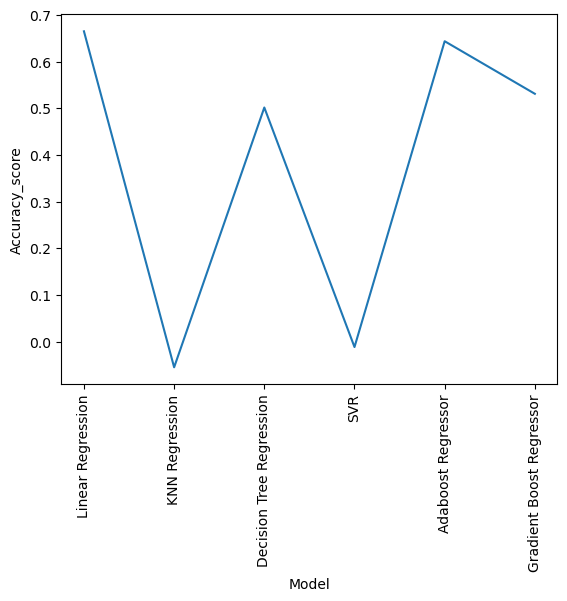

In [16]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)